<a href="https://colab.research.google.com/github/shawntharoo/GoogleColabProjects/blob/main/Copy_of_MBA509_A3_Sentiments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 142345_Kaluthara Koralalage Sandakelum Tharindu Adikaram_AI/ML_Sentiment Analysis
# MBA509_A3_Sentiments_Analysis

The following codesegment is designed to conduct sentiment analysis on text data using machine lerning algorithms. Sentiment analysis is categorizing the openions expressed in a test to identify if it is negative, positive or neutral.  it accept text data such as sentences, paragraphs as input and provide a prediction about which category the text is belonged. As an example this code segment take user reviews from a popular fragnance and decide if the review is negative or positive.  This algorith is developed using Python language and corresponding Python libraries. The main library is called "ludwig". Ludwig is a opensource pyton tool box specifically designed to develop machine learning models without writing codes.Ludwig is built on top of tensaflow. A historical dataset from Tweets have been used to train the model before used with real data. after training is completed a test round has been conducted to see the performance of the model. This model use two deep learning algorithms to perform the task which are,  Bi-LSTM algorithm which is a type of Recurrent Neural Network  and  Convolutional Neural Networks. while getting the predictions from both methods the code segment is further enhanced to compare the performance of each method.



We will cover the following Deep Learning algorithms:
* Convolutional Neural Networks
* Long-Short-Term-Memory (LSTMs), which is a type of Recurrent Neural Network (RNNs)

**Mounting Google Drive**

* Colab needs to be connected (mount) to Google Drive. This connection allows Colab to save data (e.g. CSV files) to Google Drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install Libraries**

In [ ]:
# this is the workaround for GPU error cuDNN
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 43 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (61.3 MB/s)
(Reading database ... 155632 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155610 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [ ]:
!pip install ludwig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 443 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 409 kB 48.2 MB/s 
     |████████████████████████████████| 47 kB 5.0 MB/s 
     |████████████████████████████████| 6.2 MB 61.1 MB/s 
     |████████████████████████████████| 80 kB 11.4 MB/s 
     |████████████████████████████████| 140 kB 73.6 MB/s 
     |████████████████████████████████| 4.2 MB 48.8 MB/s 
     |████████████████████████████████| 1.0 MB 58.4 MB/s 
     |████████████████████████████████| 660 kB 62.3 MB/s 
     |████████████████████████████████| 181 kB 74.3 MB/s 
     |████████████████████████████████| 457 kB 71.9 MB/s 
     |████████████████████████████████| 42 kB 2.0 MB/s 
     |████████████████████████████████| 10.1 MB 56.5 MB/s 
     |████████████████████

In [ ]:
!pip install ludwig[text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ludwig[visualize]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install petastorm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 284 kB 5.0 MB/s 
     |████████████████████████████████| 44 kB 3.5 MB/s 
     |████████████████████████████████| 281.4 MB 32 kB/s 
     |████████████████████████████████| 198 kB 58.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=24e3ec34672ee924cf1f45b8b0b8d5ccd21edc02da508fefadfd1f8c8b686174
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


**Import Libraries**

In [ ]:
import ludwig
from ludwig.api import LudwigModel

NumExpr defaulting to 2 threads.
import ray failed with exception: No module named 'ray'


In [ ]:
from ludwig.visualize import learning_curves, compare_performance, compare_classifiers_predictions

In [ ]:
from ludwig import visualize

In [ ]:
from ludwig.utils.nlp_utils import load_nlp_pipeline, process_text

In [ ]:
from ludwig.utils.data_utils import load_json

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from matplotlib import pyplot as plt
import yaml
import pandas as pd
import numpy as np

In [ ]:
import logging

# Load Dataset & Preprocess Data

* Twitter Tweets

**Twitter Tweets**

In [ ]:
# create a variable to store tweets data
tweets  = pd.read_csv('https://s3.ap-northeast-1.wasabisys.com/pubdatasets/tweets/sentiment140_160k_tweets_train.csv')

In [ ]:
tweets

,target,ids,user,text
0,p,1978186076,ceruleanbreeze,"@nocturnalie Anyway, and now Abby and I share ..."
1,p,1994697891,enthusiasticjen,@JoeGigantino Few times I'm trying to leave co...
2,p,2191885992,LifeRemixed,@AngieGriffin Good Morning Angie I'll be in t...
3,p,1753662211,lovemandy,"had a good day driving up mountains, visiting ..."
4,p,2177442789,_LOVELYmanu,downloading some songs i love lady GaGa.
...,...,...,...,...
159980,n,1827557704,starrjonze,@sherylmae Same here! Listening to &quot;BBC S...
159981,n,2190737777,feetonheat,Watching Arashi &gt; Research Methods B report...
159982,n,2178341929,lewisreilly,is not looking forward to results today .. bri...
159983,n,1836168272,mizprettyash,@chasdizz it was painful....it still hurts too


In [ ]:
# find/match for negative sentiments
tweets[tweets['target'].str.match('n')]

,target,ids,user,text
80000,n,2016716370,Cinesv,"has just been in a funeral, oh gosh how I miss..."
80001,n,2067684380,yanarropak,Man.. I wish a lot of things
80002,n,2326540525,Heyhomee,"@GeeNote no, I feel like trash, sitting on the..."
80003,n,1827835793,ilikedinosrawr,Eff. Working 1 to 8
80004,n,2263145821,sfgiantsgirl,"@Tina_Murphy @AK618 sadly, true but at least ..."
...,...,...,...,...
159980,n,1827557704,starrjonze,@sherylmae Same here! Listening to &quot;BBC S...
159981,n,2190737777,feetonheat,Watching Arashi &gt; Research Methods B report...
159982,n,2178341929,lewisreilly,is not looking forward to results today .. bri...
159983,n,1836168272,mizprettyash,@chasdizz it was painful....it still hurts too


In [ ]:
tweets.shape

(159985, 4)

In [ ]:
tweets.target.unique

<bound method Series.unique of 0         p
1         p
2         p
3         p
4         p
         ..
159980    n
159981    n
159982    n
159983    n
159984    n
Name: target, Length: 159985, dtype: object>

In [ ]:
tweets.target.value_counts()

p    80000
n    79985
Name: target, dtype: int64

In [ ]:
grouped_tweets = tweets.groupby('target')
grouped_tweets.apply(lambda x: x.sample(grouped_tweets.size().min()))

target         ids             user  \
target                                              
n      157123      n  2190310611     freakadelica   
       101841      n  1967098968     VampireFaust   
       126963      n  1686635697        sheppo287   
       84109       n  2189303546       wanderblah   
       151992      n  2016867713      sexygiblets   
...              ...         ...              ...   
p      31294       p  1695619987     fuseboxradio   
       72876       p  2057835288      brucewagner   
       19861       p  2049691162     KaitlinRussy   
       24205       p  1980177588  CourtneyLynn616   
       13039       p  1914427424     SweetChhavvi   

                                                            text  
target                                                            
n      157123                   I'm hungry and there is no food   
       101841  @amhartnett Yes, it's absurd to think they wou...  
       126963  gold logie goes to ....... REBECCA GIBNEY!!!!!...  
       84109   and zenk you boys! @Karthik @adityab @bhuto th...  
       151992                     I wish I was home with Kelhen   
...                                                          ...  
p      31294   @missyIbee Not a problem at all sis - respect ...  
       72876   @JanMasters thanks for letting me know! I appr...  
       19861                   lazy friday night with my chicas   
       24205   Looking forward to going out for a bike ride! ...  
       13039                Love this song.  http://bit.ly/VJDPO  

[159970 rows x 4 columns]

**Preprocess Data**

We will need three small samples of data for convenience:
* data for training algorithms (teaching it)
* data for the algorithm to validate what it has learned
* data for testing to see how well it has learned
* Finally, we will create a "fake" tweet to see if the algorithms can accurately determine the sentiment in the sentences

* frac - specifies the percentage of data to take
* random state - ensures that the sampling is repeatable

In [ ]:
# first lets convert the target column to binary
tweets['target'] = tweets['target'].apply(lambda x: 1 if x =='p' else 0)

In [ ]:
grouped_tweets = tweets.groupby('target')
grouped_tweets.apply(lambda x: x.sample(grouped_tweets.size().min()))

target         ids            user  \
target                                              
0      137817       0  2262501603          charod   
       107978       0  1966160193  T0xIc_CaNdY101   
       111145       0  2326319085   Shannon_xoxox   
       117396       0  1971180663       rockslife   
       117738       0  2203549585   Teresinarules   
...               ...         ...             ...   
1      59302        1  1679209238    alltimeemily   
       34015        1  1961246439       momadvice   
       11465        1  1971721488       geee_geee   
       74077        1  1982998076  britneyfrancis   
       25865        1  1976637439        solerika   

                                                            text  
target                                                            
0      137817  ..i gotta come up with something QUICK as ya'l...  
       107978                   nothing to do on a friday night   
       111145                     is too hot  needs ice-cream =D  
       117396  @roxygirl880829 thanks 4 the reply. ive bin wa...  
       117738  @parttimebowler personally i want a purple one...  
...                                                          ...  
1      59302                                    Making brownies   
       34015   @jlk77 Ha! Interesting...well, it should make ...  
       11465                                       goodmorning!   
       74077   @CristalBubblin I hear you... I barely got up ...  
       25865   ariels grandma's house is beautiful! i love gr...  

[159970 rows x 4 columns]

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159985 entries, 0 to 159984
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  159985 non-null  int64 
 1   ids     159985 non-null  int64 
 2   user    159985 non-null  object
 3   text    159985 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.9+ MB


In [ ]:
# examine the dataframe again
tweets

,target,ids,user,text
0,1,1978186076,ceruleanbreeze,"@nocturnalie Anyway, and now Abby and I share ..."
1,1,1994697891,enthusiasticjen,@JoeGigantino Few times I'm trying to leave co...
2,1,2191885992,LifeRemixed,@AngieGriffin Good Morning Angie I'll be in t...
3,1,1753662211,lovemandy,"had a good day driving up mountains, visiting ..."
4,1,2177442789,_LOVELYmanu,downloading some songs i love lady GaGa.
...,...,...,...,...
159980,0,1827557704,starrjonze,@sherylmae Same here! Listening to &quot;BBC S...
159981,0,2190737777,feetonheat,Watching Arashi &gt; Research Methods B report...
159982,0,2178341929,lewisreilly,is not looking forward to results today .. bri...
159983,0,1836168272,mizprettyash,@chasdizz it was painful....it still hurts too


**Dataset to train the algorithm**

In [ ]:
# take a small sample of tweets to train machine learning
tweets_train = tweets.sample(frac=0.10, replace=False, random_state=3)

In [ ]:
tweets_train

,target,ids,user,text
31939,1,1981722171,giogoirocks,sun shining! FACE MASKS
68848,1,1989165331,staaceeyy,@judez_xo omg i hate you ily.
24932,1,2174706602,paigezewizard,I will be fiveteen in a matter of one hour
1028,1,1978953198,funkagenda,@drunkos Nah there is a mistake on it I will ...
146962,0,1553576804,chathura88,again back to Ubuntu 8.10 form Fedora
...,...,...,...,...
92224,0,2048612738,Beeyezzy,wit my dude we sitting in traffic and rain thi...
97001,0,2054862503,AuntieGingerJo,Seriously slept shitty. Can't win. Someone kep...
98987,0,2174810535,EmilyJamesK,@CarnivalBunny Are You serious? You never told...
88832,0,2237224764,MMidas,Sushi Robot with pressure driven robot hand ht...


**Dataset for validation**

In [ ]:
tweets_validation = tweets.sample(frac=0.05, replace=False, random_state=3)

In [ ]:
tweets_validation

,target,ids,user,text
31939,1,1981722171,giogoirocks,sun shining! FACE MASKS
68848,1,1989165331,staaceeyy,@judez_xo omg i hate you ily.
24932,1,2174706602,paigezewizard,I will be fiveteen in a matter of one hour
1028,1,1978953198,funkagenda,@drunkos Nah there is a mistake on it I will ...
146962,0,1553576804,chathura88,again back to Ubuntu 8.10 form Fedora
...,...,...,...,...
82283,0,1836108609,xAllie,pain in the back of my head ouchhh
94433,0,2181028006,surfindolphin7,"@denyreligion Good article in USA Today, today..."
67663,1,2012972387,maryweigand,Kels with ross and eastttt
97442,0,2000551352,Retarded109,"hmm i gotta upload pictures TOMORROW, imma mis..."


**Dataset for testing**

In [ ]:
tweets_test = tweets.sample(frac=0.05, replace=False, random_state=3)

In [ ]:
tweets_test

,target,ids,user,text
31939,1,1981722171,giogoirocks,sun shining! FACE MASKS
68848,1,1989165331,staaceeyy,@judez_xo omg i hate you ily.
24932,1,2174706602,paigezewizard,I will be fiveteen in a matter of one hour
1028,1,1978953198,funkagenda,@drunkos Nah there is a mistake on it I will ...
146962,0,1553576804,chathura88,again back to Ubuntu 8.10 form Fedora
...,...,...,...,...
82283,0,1836108609,xAllie,pain in the back of my head ouchhh
94433,0,2181028006,surfindolphin7,"@denyreligion Good article in USA Today, today..."
67663,1,2012972387,maryweigand,Kels with ross and eastttt
97442,0,2000551352,Retarded109,"hmm i gotta upload pictures TOMORROW, imma mis..."


# Exploratory Data Analysis

* Create a word cloud to see prominent words in the tweets

In [ ]:
# use the entire tweets
processed_train_data = process_text(' '.join(tweets['text']),
                                    load_nlp_pipeline('en'),
                                    filter_punctuation=True,
                                    filter_stopwords=True)

Loading NLP pipeline
 spaCy {} model is missing, downloading it (this will only happen once)


/usr/local/lib/python3.7/dist-packages/spacy/util.py:845: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.3.1,<3.4.0
  warnings.warn(warn_msg)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# create the word cloud variable to store the words
wordcloud = WordCloud(background_color='black', collocations=False,
                      stopwords=STOPWORDS).generate(' '.join(processed_train_data))

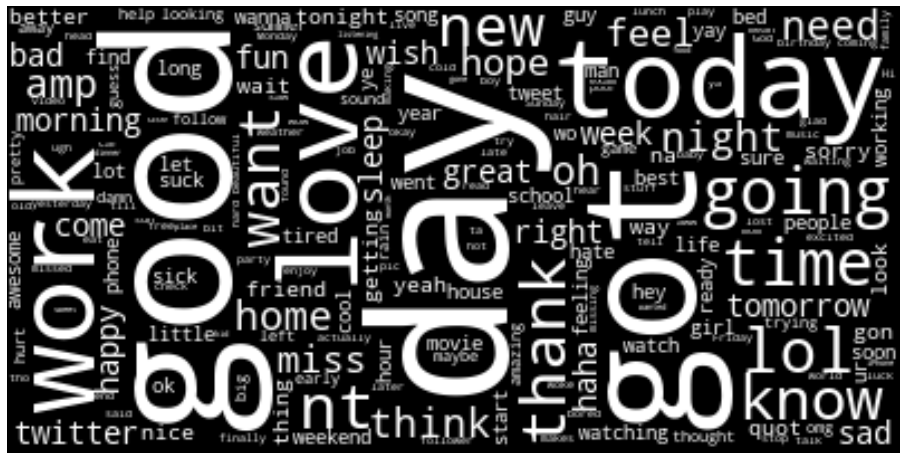

In [ ]:
# use matplotlib to visualise the data stored in wordcloud variable
plt.figure(figsize=(16,16))
plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs:'white'), interpolation='bilinear')
plt.axis('off')
plt.show()

# Machine Learning (Deep Learning) with Ludwig AI

* Ludwig is built on top of Tensorflow - an opensource AI platform from Google: https://www.tensorflow.org/
* Ludwig simplifies Tensorflow by using the  "declarative apprroach", which simply means that AI is constructed by passing parameters to Ludwig (telling Ludwig what we want)

In [ ]:
# check the training dataset again
tweets_train

,target,ids,user,text
31939,1,1981722171,giogoirocks,sun shining! FACE MASKS
68848,1,1989165331,staaceeyy,@judez_xo omg i hate you ily.
24932,1,2174706602,paigezewizard,I will be fiveteen in a matter of one hour
1028,1,1978953198,funkagenda,@drunkos Nah there is a mistake on it I will ...
146962,0,1553576804,chathura88,again back to Ubuntu 8.10 form Fedora
...,...,...,...,...
92224,0,2048612738,Beeyezzy,wit my dude we sitting in traffic and rain thi...
97001,0,2054862503,AuntieGingerJo,Seriously slept shitty. Can't win. Someone kep...
98987,0,2174810535,EmilyJamesK,@CarnivalBunny Are You serious? You never told...
88832,0,2237224764,MMidas,Sushi Robot with pressure driven robot hand ht...


# Convolutional Neural Networks (CNNs)

# The configuration (rules) we will provide Ludwig AI

In [ ]:
# ludwig requires a configuration setting in order to create the AI model
config = {
    'input_features': [{ 
        'name': 'text',
        'type': 'text', 
        'level': 'word', 
        'encoder': 'parallel_cnn'
    }],
    'output_features': [{
        'name': 'target', 
        'type': 'category'}],
    'training': {
        'decay': True,
        'learning_rate': 0.001,
        'epochs': 20,
        'validation_field': 'target',
        'validation_metric': 'accuracy'
    }
}

In [ ]:
# Initialize a Ludwig model
print("Starting Ludwig...")
para_cnn_model = LudwigModel(config, logging_level=logging.DEBUG)

Starting Ludwig...


In [ ]:
print("Training Model...")
train_stats_para_cnn_model, _, _ = para_cnn_model.train(
    training_set=tweets_train,
    validation_set=tweets_validation,
    test_set=tweets_test,
    model_name='para_cnn_model',
    skip_save_processed_input=True
)

Training Model...

╒════════════════════════╕
│ EXPERIMENT DESCRIPTION │
╘════════════════════════╛

╒══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ para_cnn_model                                                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/results/api_experiment_para_cnn_model                                          │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┤
│ ludwig_version   │ '0.5.2'                                                                                 │
├──────────

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py:299: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ../aten/src/ATen/native/Convolution.cpp:744.)
  self.padding, self.dilation, self.groups)


Streaming output truncated to the last 5000 lines.
evaluation for train: obtained next batch memory used: 5456.25MB
evaluation for train: completed batch 63 memory used: 5456.25MB
evaluation for train: obtained next batch memory used: 5456.25MB
evaluation for train: completed batch 64 memory used: 5456.25MB
evaluation for train: obtained next batch memory used: 5456.25MB
Evaluation train:  52%|█████▏    | 65/125 [00:01<00:01, 51.06it/s]evaluation for train: completed batch 65 memory used: 5456.25MB
evaluation for train: obtained next batch memory used: 5456.25MB
evaluation for train: completed batch 66 memory used: 5456.25MB
evaluation for train: obtained next batch memory used: 5456.25MB
evaluation for train: completed batch 67 memory used: 5456.25MB
evaluation for train: obtained next batch memory used: 5456.25MB
evaluation for train: completed batch 68 memory used: 5456.25MB
evaluation for train: obtained next batch memory used: 5456.25MB
evaluation for train: completed batch 69 mem

Training:  90%|█████████ | 2250/2500 [03:07<00:20, 11.97it/s]


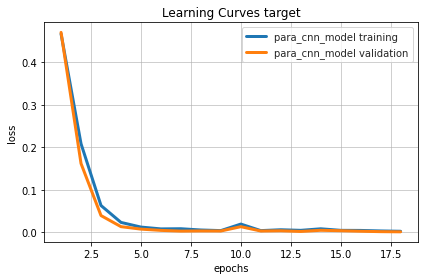

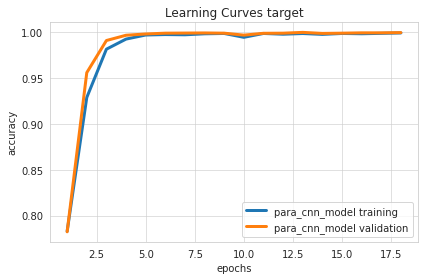

In [ ]:
# visualise training results
learning_curves(train_stats_para_cnn_model, output_feature_name='target', model_names='para_cnn_model')

# Long-Short-Term-Memory (LSTMs)

In [ ]:
# bi-directional ludwig has a bug: https://github.com/ludwig-ai/ludwig/issues/1735
config_lstm = {
    'input_features': [{
        'name': 'text',
        'type': 'text',
        'level': 'word',
        'encoder': 'rnn',
        'cell_type': 'lstm',
        'bidirectional': False
    }],
    'output_features': [{
        'name': 'target', 
        'type': 'category'
        }],
    'training': {
        'decay': True,
        'learning_rate': 0.001,
        'epochs': 20,
        'validation_field': 'target',
        'validation_metric': 'accuracy'
    }
}


In [ ]:
# Initialize a Ludwig model
print("Starting Ludwig...")
lstm_model = LudwigModel(config_lstm, logging_level=logging.DEBUG)

Starting Ludwig...


In [ ]:
print("Training Model...")
train_stats_lstm_model, _,_ = lstm_model.train(
    training_set=tweets_train,
    validation_set=tweets_validation,
    test_set=tweets_test,
    model_name='lstm_model',
    skip_save_processed_input=True
)

Streaming output truncated to the last 5000 lines.
training: completed batch 169 memory used: 5467.17MB
Training:   7%|▋         | 170/2500 [00:10<01:27, 26.75it/s]training: completed batch 170 memory used: 5467.17MB
training: completed batch 171 memory used: 5467.17MB
training: completed batch 172 memory used: 5467.17MB
training: completed batch 173 memory used: 5467.17MB
Training:   7%|▋         | 174/2500 [00:10<01:22, 28.30it/s]training: completed batch 174 memory used: 5467.17MB
training: completed batch 175 memory used: 5467.17MB
training: completed batch 176 memory used: 5467.17MB
training: completed batch 177 memory used: 5467.17MB
Training:   7%|▋         | 178/2500 [00:10<01:20, 29.00it/s]training: completed batch 178 memory used: 5467.17MB
training: completed batch 179 memory used: 5467.17MB
training: completed batch 180 memory used: 5467.17MB
training: completed batch 181 memory used: 5467.17MB
Training:   7%|▋         | 182/2500 [00:10<01:18, 29.49it/s]training: completed 

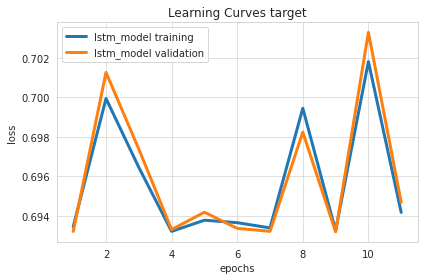

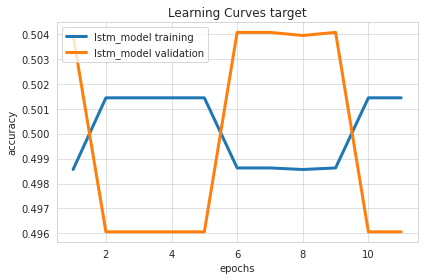

In [ ]:
# visualise training results
learning_curves(train_stats_lstm_model, output_feature_name='target', model_names='lstm_model')

# Model Evaluation & Comparison

In [ ]:
para_cnn_model = LudwigModel.load('/content/results/api_experiment_para_cnn_model/model')
test_stats_para_cnn_model, predictions_para_cnn, _ = para_cnn_model.evaluate(
  dataset=tweets_test,
  skip_save_predictions=False,
  collect_predictions=True,
  output_directory='test_results/para_cnn_model'
  )

In [ ]:
lstm_model = LudwigModel.load('/content/results/api_experiment_lstm_model/model')
test_stats_lstm_model, predictions_lstm_model, _ = lstm_model.evaluate(
  dataset=tweets_test,
  skip_save_predictions=False,
  collect_predictions=True,
  output_directory='test_results/lstm_model'
  )

# Performance Comparison

### If using only Paralell Convolutional Neural Network (CNN) and Long-Short-Term-Memomry (LSTM)

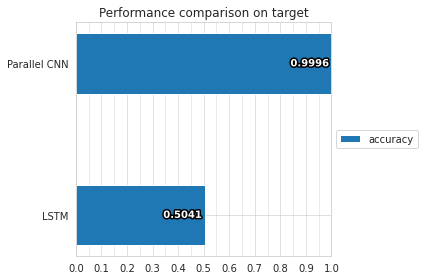

In [ ]:
compare_performance([test_stats_para_cnn_model, test_stats_lstm_model],
                    output_feature_name='target', model_names=['Parallel CNN', 'LSTM'])

# Model Predictions - Comparisons

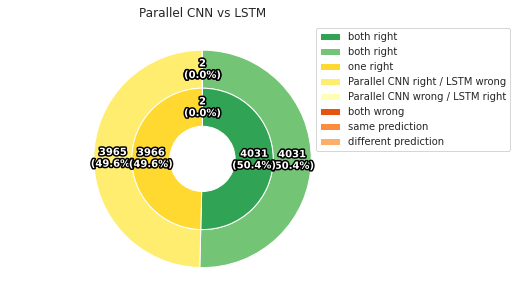

In [ ]:
metadata_para_cnn = load_json('/content/results/api_experiment_para_cnn_model/model/training_set_metadata.json')

compare_classifiers_predictions([np.array(predictions_para_cnn['target_predictions'], dtype=int),
                                np.array(predictions_lstm_model['target_predictions'], dtype=int)],
                                ground_truth=np.array(tweets_test['target']), labels_limit=5,
                                output_feature_name='target', metadata=metadata_para_cnn,
                                model_names=['Parallel CNN', 'LSTM'])

# Test Model on New Data (Unseen Data)

**Create a list of tweets**

In [ ]:
# pretend tweets
fake_tweets = ["This is an amazing fake news!", 
         "That was an amazing game!", 
         "Wow, I can't believe it.",
         "Rubbish!",
         "It was not very good!",
         "it was terrible tweet"]

**Convert the list of tweets into a dataframe**

In [ ]:
# converting the text into dataframes
tweets_df = pd.DataFrame({'text': fake_tweets})

In [ ]:
tweets_df

,text
0,This is an amazing fake news!
1,That was an amazing game!
2,"Wow, I can't believe it."
3,Rubbish!
4,It was not very good!
5,it was terrible tweet


# **Predict the sentiments of the tweets**

### Predict using Parallel CNN

In [ ]:
# predicting using our best model
predictions_cnn, _ = para_cnn_model.predict(dataset=tweets_df)

In [ ]:
predictions_cnn

,target_predictions,target_probabilities,target_probability,target_probabilities_<UNK>,target_probabilities_0,target_probabilities_1
0,1,"[2.433081461472664e-18, 1.3697507483811933e-07...",1.000000,2.433081e-18,1.369751e-07,1.000000
1,1,"[1.5585293784614607e-19, 4.517355023381242e-08...",1.000000,1.558529e-19,4.517355e-08,1.000000
2,0,"[4.132264621148352e-06, 0.9944855570793152, 0....",0.994486,4.132265e-06,9.944856e-01,0.005510
3,0,"[3.7133287555946026e-09, 0.9998109936714172, 0...",0.999811,3.713329e-09,9.998110e-01,0.000189
4,0,"[2.62853063759394e-06, 0.9590191841125488, 0.0...",0.959019,2.628531e-06,9.590192e-01,0.040978
5,0,"[1.5552135135266099e-09, 0.9999041557312012, 9...",0.999904,1.555214e-09,9.999042e-01,0.000096


### Predict using LSTM

In [ ]:
predictions_lstm_model, _ = lstm_model.predict(dataset=tweets_df)

In [ ]:
predictions_lstm_model

,target_predictions,target_probabilities,target_probability,target_probabilities_<UNK>,target_probabilities_0,target_probabilities_1
0,0,"[9.999061148846522e-05, 0.5128335356712341, 0....",0.512834,0.0001,0.512834,0.487067
1,0,"[9.999061148846522e-05, 0.5128335356712341, 0....",0.512834,0.0001,0.512834,0.487067
2,0,"[9.999061148846522e-05, 0.5128335356712341, 0....",0.512834,0.0001,0.512834,0.487067
3,0,"[9.999061148846522e-05, 0.5128335356712341, 0....",0.512834,0.0001,0.512834,0.487067
4,0,"[9.999061148846522e-05, 0.5128335356712341, 0....",0.512834,0.0001,0.512834,0.487067
5,0,"[9.999061148846522e-05, 0.5128335356712341, 0....",0.512834,0.0001,0.512834,0.487067


# Suppose that you have "Customer Reviews" stored in your Google Drive as an Excel Spreadsheet.

* the spreadsheet must contain one-columns of data  with a column heading called 'reviews'
* name your filename reviews.xlsx

In [ ]:
# read excel spreadsheet and create a dataframe
df = pd.read_excel('/content/drive/MyDrive/reviews.xlsx')

In [ ]:
# display dataframe
df

,reviews
0,Upon first application it has a pleasant sweet...
1,This is the first perfume that ever made me un...
2,This Yves Saint Laurent Black Opium Extreme is...
3,This sent from channel and supplied through My...
4,This is the only Chanel fragrance I own as it’...
5,Chanel perfumes have always been a staple and ...
6,I returned it two days after I purchased it. T...
7,Pretty disappointed in this perfume. I was SO ...
8,I tested this in store out of curiosity. I don...
9,There is something very wrong with this perfum...


In [ ]:
# create a new variable called user_reviews and store the data from the reviews column
user_reviews  = df['reviews']

In [ ]:
# now create a dataframe from the user_reviews with the column heading of text (needed by AI)
user_reviews_df = pd.DataFrame({'text': user_reviews})

# Predict sentiments on user reviews

## Predict using CNN

In [ ]:
# predicting using our best model
predictions_cnn, _ = para_cnn_model.predict(dataset=user_reviews_df)

In [ ]:
predictions_cnn

,target_predictions,target_probabilities,target_probability,target_probabilities_<UNK>,target_probabilities_0,target_probabilities_1
0,1,"[2.8237837415567846e-11, 0.048625390976667404,...",0.951375,2.823784e-11,0.048625,9.513747e-01
1,0,"[1.61306786070764e-14, 0.9999995231628418, 4.8...",1.000000,1.613068e-14,1.000000,4.846017e-07
2,1,"[5.580480167220313e-16, 8.723954124434385e-06,...",0.999991,5.580480e-16,0.000009,9.999913e-01
3,1,"[7.791876172058565e-11, 0.016652019694447517, ...",0.983348,7.791876e-11,0.016652,9.833480e-01
4,0,"[2.6310398304474347e-10, 0.9962683916091919, 0...",0.996268,2.631040e-10,0.996268,3.731630e-03
5,1,"[2.4325881586850784e-11, 0.3794223964214325, 0...",0.620578,2.432588e-11,0.379422,6.205776e-01
6,0,"[7.599053331031058e-11, 0.9983370304107666, 0....",0.998337,7.599053e-11,0.998337,1.662944e-03
7,0,"[5.602365238388529e-10, 0.9899645447731018, 0....",0.989965,5.602365e-10,0.989965,1.003543e-02
8,0,"[4.4470483339612704e-15, 0.9999997615814209, 2...",1.000000,4.447048e-15,1.000000,2.695503e-07
9,0,"[1.1290410880521184e-12, 0.9999929666519165, 6...",0.999993,1.129041e-12,0.999993,6.991692e-06


In [ ]:
# save predictions to Google drive as CSV file
predictions_cnn.to_csv('/content/drive/MyDrive/predictions_cnn.csv')

## Predict using Bi-LSTM

In [ ]:
predictions_lstm, _ = lstm_model.predict(dataset=user_reviews_df)

In [ ]:
# save predictions as CSV file to Google drive
predictions_lstm.to_csv('/content/drive/MyDrive/predictions_lstm.csv')